# Spotify Wrapped Insights - Kaggle Analysis

Analyze your personal Spotify Wrapped playlist data to uncover listening trends and patterns.

**To use this notebook:**

1. From [this GitHub repository](https://github.com/yatharthsood00/spotify-wrapped-insights), follow Part 1 to generate your `working.csv`
2. Upload that CSV file to this notebook
3. Run the cells below to explore your Wrapped history!

---

## Import dependencies


In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import os


## Setup: Load Your Data

Upload your `working.csv` file from the Spotify Wrapped Insights pipeline.

In [2]:

# Load your working.csv - support both Kaggle (uploads/) and local (../data/) paths
csv_path = 'working.csv'
if not os.path.exists(csv_path):
    csv_path = '../data/working.csv'
    
df = pd.read_csv(csv_path)

# Display basic info
years = sorted([col for col in df.columns if col not in ['name', 'artists', 'song_id', 'id', 'list_appearances', 'score']])
print(f"Loaded {len(df)} unique songs across {len(years)} years ({min(years)}-{max(years)})")
print(f"\nDataset shape: {df.shape}")
df.head()

Loaded 516 unique songs across 8 years (2018-2025)

Dataset shape: (516, 14)


,name,artists,song_id,id,list_appearances,score,2018,2019,2020,2021,2022,2023,2024,2025
0,OKRA,"['Tyler, The Creator']",003616ca0dce36903df746ece4b6a346,74ZovzRxHBvCq5yIwe8boh,2,142,0,1,0,0,59,0,0,0
1,Shock Doctrine,['Reznyck'],00bb65784f2755818010c224885f4bfe,1MKrz0f2fIw1GcabcqinK1,1,43,0,0,58,0,0,0,0,0
2,Enjoy the Silence,['Trevor Something'],01a219fbaca7279aa79e53891dc0ea05,51tWcK9KRc2WyleZ82AGT4,3,118,0,20,0,68,97,0,0,0
3,King Of The Mountain,['Kate Bush'],01fb96d3a06c1f8b765cdfd872c6963c,21ZTkAe7nw4kAR1aHyZXSx,1,78,0,0,0,0,23,0,0,0
4,Pogo,['Digitalism'],028333041e8a0e9fba9f8bf37d50a2d3,4CLZlTPjaKqbadAJc031OQ,3,178,0,2,47,76,0,0,0,0


## Understanding Your Data

Before diving into analysis, here's how your data was processed:

### Data Processing Pipeline

1. **Fetch**: Raw playlists fetched from Spotify API
2. **Deduplication**: Songs with identical names + artists merged (handles different Spotify IDs from album vs. single releases)
3. **Pivoting**: Data transformed from "year → tracks" into "song_id → yearly ranks"
4. **Metrics**: Consistency and scoring metrics calculated

### Column Meanings

- **`name`**: Track name
- **`artists`**: List of artist names (appears as string like `"['Artist1', 'Artist2']"`)
- **`song_id`**: Unique identifier (MD5 hash of lowercase track name + sorted artists)
  - Deduplicates multiple Spotify IDs for the same song
  - Handles capitalization variations ("The" vs "the")
- **`id`**: Original Spotify track ID
- **`list_appearances`**: Count of Wrapped playlists containing this song
- **`score`**: Ranking score = sum of `(100 - rank + 1)` for each appearance
  - Accounts for both presence AND better ranks
  - Higher score = more consistent favorite
- **Year columns (2018, 2019, ...)**:
  - `0` = song not in that year's Wrapped
  - `1-100` = song's rank in that year's list (1 is your favorite, 100 is 100th track)

### Example: Interpreting a Row

`score=285, list_appearances=3, 2023=5, 2024=3, 2025=1`

→ Song appeared in 3 playlists (2023-2025), peaked at #1 in 2025, was #3 in 2024, #5 in 2023 = one of your enduring favorites!

## Understanding Your Data

Before diving into analysis, here's how your data was processed:

### Data Processing Pipeline

1. **Fetch**: Raw playlists fetched from Spotify API
2. **Deduplication**: Songs with identical names + artists are merged into one entry (handles different Spotify IDs, album vs. single releases)
3. **Pivoting**: Data transformed from "year → tracks" into "song_id → yearly ranks"
4. **Metrics**: Calculated consistency and scoring metrics

### Column Meanings

- **`name`**: Track name
- **`artists`**: List of artist names (e.g., `"['Artist1', 'Artist2']"`)
- **`song_id`**: Unique identifier (MD5 hash of track name + sorted artists)
  - Handles duplicate Spotify IDs from different releases
  - Lowercase to handle capitalization variations
- **`id`**: Original Spotify track ID
- **`list_appearances`**: How many Wrapped playlists this song appeared in (0-7 typically)
- **`score`**: Ranking score = sum of `(100 - rank + 1)` for each appearance
  - Accounts for both presence and better ranks
  - Higher = more consistent/highly-ranked favorite
- **Year columns (2018, 2019, ...)**:
  - `0` = song not in that year's Wrapped
  - `1-100` = song's rank in that year's list (1 = favorite, 100 = 100th track)

### Example: Song Interpretation

If a row shows: `score=285, list_appearances=3, 2023=5, 2024=3, 2025=1`

→ This song appeared in 3 playlists, was 5th in 2023, 3rd in 2024, 1st in 2025 = consistently loved!

## Analysis

Below are various analyses of your Wrapped playlists.

### Most Popular Artists

Artists with the most tracks across your Wrapped playlists.

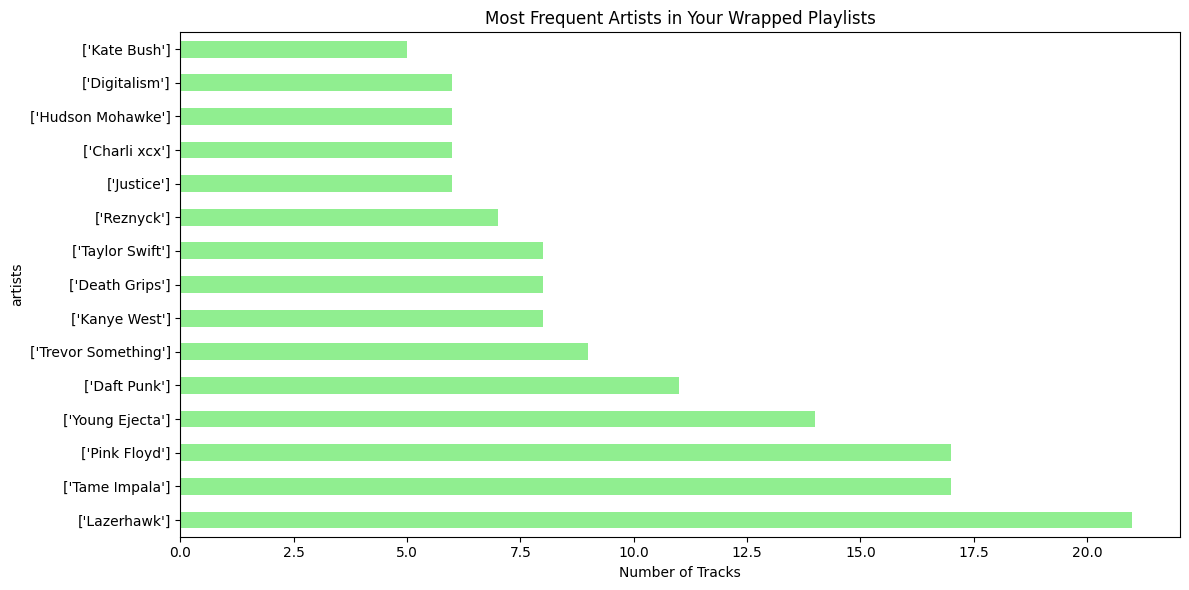

artists
['Lazerhawk']           21
['Tame Impala']         17
['Pink Floyd']          17
['Young Ejecta']        14
['Daft Punk']           11
['Trevor Something']     9
['Kanye West']           8
['Death Grips']          8
['Taylor Swift']         8
['Reznyck']              7
['Justice']              6
['Charli xcx']           6
['Hudson Mohawke']       6
['Digitalism']           6
['Kate Bush']            5
Name: count, dtype: int64

In [3]:
# Extract years from columns
years = sorted([col for col in df.columns if isinstance(col, int)])

# Expand artists and count
exploded = df.explode('artists')
artist_counts = exploded['artists'].value_counts().head(15)

# Visualize
plt.figure(figsize=(12, 6))
artist_counts.plot(kind='barh', color='lightgreen')
plt.xlabel('Number of Tracks')
plt.title('Most Frequent Artists in Your Wrapped Playlists')
plt.tight_layout()
plt.show()

artist_counts

### Song Appearance Patterns

How many playlists did each song appear in?

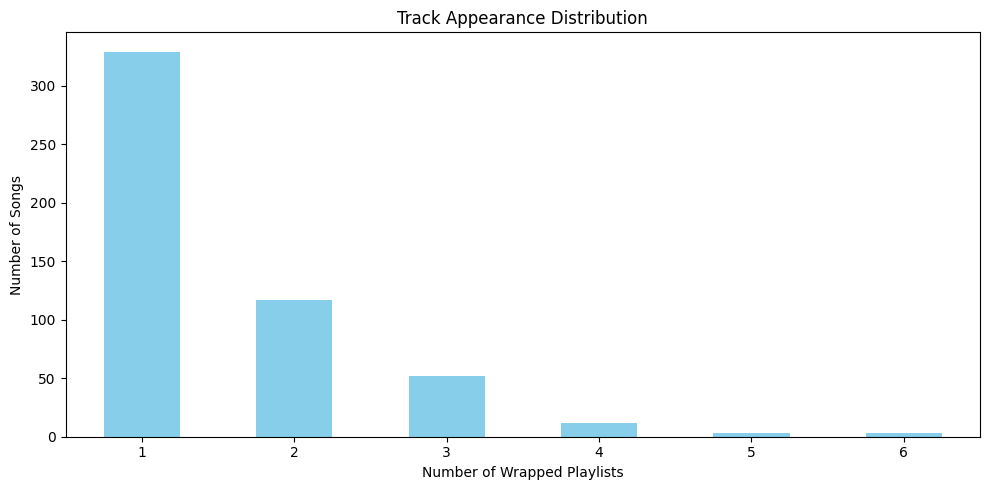


Average appearances per song: 1.55
Most consistent track appeared in 6 playlists
329 tracks appeared in only 1 playlist


In [4]:
# Distribution of appearances
appearance_counts = df['list_appearances'].value_counts().sort_index()

plt.figure(figsize=(10, 5))
appearance_counts.plot(kind='bar', color='skyblue')
plt.xlabel('Number of Wrapped Playlists')
plt.ylabel('Number of Songs')
plt.title('Track Appearance Distribution')
plt.xticks(rotation=0)
plt.tight_layout()
plt.show()

print(f"\nAverage appearances per song: {df['list_appearances'].mean():.2f}")
print(f"Most consistent track appeared in {df['list_appearances'].max()} playlists")
print(f"{len(df[df['list_appearances'] == 1])} tracks appeared in only 1 playlist")

### High-Scoring Tracks

Tracks with highest combined scores (ranking + consistency).

In [5]:
# Top tracks by score
top_tracks = df.nlargest(10, 'score')[['name', 'artists', 'list_appearances', 'score']].copy()
top_tracks.index = range(1, len(top_tracks) + 1)
top_tracks

,name,artists,list_appearances,score
1,Overdrive,['Lazerhawk'],5,383
2,SLOW DANCING IN THE DARK,['Joji'],6,343
3,Eleanor Lye,['Young Ejecta'],4,302
4,Star Hustler,['Lazerhawk'],6,296
5,Let It Happen,['Tame Impala'],4,294
6,Runaway,"['Kanye West', 'Pusha T']",4,292
7,Teardrop,"['Massive Attack', 'Elizabeth Fraser']",4,289
8,After Dark,['Mr.Kitty'],4,287
9,Hide and Seek,['Imogen Heap'],4,274
10,Screen Guru,['Young Ejecta'],3,268


### Yearly Ranking Evolution

How did consistent favorites rank across years?

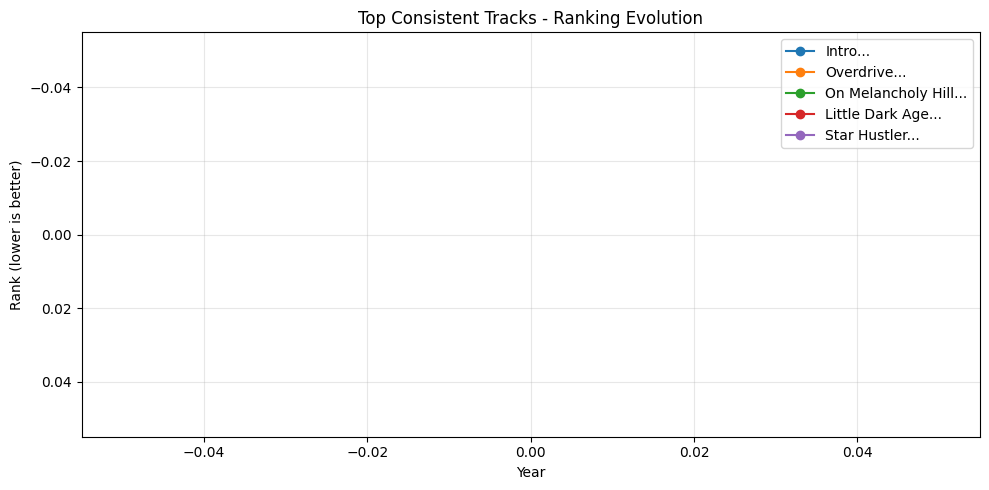

In [6]:
# Get tracks appearing in 5+ playlists
consistent = df[df['list_appearances'] >= 5].head(5).copy()

plt.figure(figsize=(10, 5))
for idx, row in consistent.iterrows():
    plt.plot(years, [row[year] if row[year] > 0 else None for year in years], 
             marker='o', label=f"{row['name'][:20]}...")

plt.xlabel('Year')
plt.ylabel('Rank (lower is better)')
plt.title('Top Consistent Tracks - Ranking Evolution')
plt.gca().invert_yaxis()
plt.legend(loc='best')
plt.grid(True, alpha=0.3)
plt.tight_layout()
plt.show()

In [7]:
# Find comebacks: songs with 2+ appearances that climbed or returned after absence
comebacks = []
multi_appearance = df[df['list_appearances'] >= 2]

for idx, row in multi_appearance.iterrows():
    off_list = False
    for i in range(len(years) - 1):
        curr_year = years[i]
        next_year = years[i + 1]
        
        curr_rank = row[curr_year]
        next_rank = row[next_year]
        
        # Track if ever absent
        if curr_rank > 0 and next_rank == 0:
            off_list = True
        
        # Improvement detected
        if next_rank > 0 and (curr_rank > next_rank or off_list):
            recovery_type = "returned" if off_list else "climbed"
            rank_change = curr_rank - next_rank if curr_rank > 0 else "∞"
            
            comebacks.append({
                'name': row['name'],
                'artists': row['artists'],
                'recovery_year': int(next_year),
                'recovery_type': recovery_type,
                'new_rank': int(next_rank),
                'score': row['score']
            })
            break

if comebacks:
    comebacks_df = pd.DataFrame(comebacks).sort_values('recovery_year', ascending=False)
    print(f"Found {len(comebacks_df)} comeback/climber tracks\n")
    comebacks_df.head(10)
else:
    print("No comeback/climber tracks found in this dataset")

No comeback/climber tracks found in this dataset


### Comebacks & Climbers

Tracks that improved rank or returned after being absent from a previous year.


In [8]:
# Find active streaks: songs in last year that have 3+ consecutive years ending in latest year
years = sorted([col for col in df.columns if col not in ['name', 'artists', 'song_id', 'id', 'list_appearances', 'score']])
streaks = []
for idx, row in df.iterrows():
    if row[years[-1]] == 0:
        continue  # Must be in latest Wrapped
    
    # Count consecutive years backwards
    streak_length = 0
    for year in reversed(years):
        if row[year] > 0:
            streak_length += 1
        else:
            break
    
    if streak_length >= 3:
        streak_start_idx = len(years) - streak_length
        streak_start_year = years[streak_start_idx]
        
        streaks.append({
            'name': row['name'],
            'artists': row['artists'],
            'streak_length': streak_length,
            'started': int(streak_start_year),
            'score': row['score'],
            'latest_rank': int(row[years[-1]])
        })

if streaks:
    streaks_df = pd.DataFrame(streaks).sort_values('streak_length', ascending=False)
    print(f"Found {len(streaks_df)} tracks with 3+ year streaks\n")
    streaks_df.head(10)
else:
    print("No tracks with 3+ year streaks found in this dataset")

Found 18 tracks with 3+ year streaks



### Active Streaks

Tracks that appeared consistently across 3+ consecutive years, ending in your latest Wrapped.


In [9]:
# Find "dream run" tracks: top 10 one year, completely absent the next
dream_runs = []
for idx, row in df.iterrows():
    for i in range(len(years) - 1):
        curr_year = years[i]
        next_year = years[i + 1]
        
        curr_rank = row[curr_year]
        next_rank = row[next_year]
        
        if 1 <= curr_rank <= 10 and next_rank == 0:
            dream_runs.append({
                'name': row['name'],
                'artists': row['artists'],
                'peak_year': curr_year,
                'peak_rank': int(curr_rank),
                'score': row['score']
            })
            break

dream_runs_df = pd.DataFrame(dream_runs).sort_values('peak_year', ascending=False)
print(f"Found {len(dream_runs_df)} dream run tracks\n")
dream_runs_df.head(10)


Found 22 dream run tracks



,name,artists,peak_year,peak_rank,score
3,Fortnight (feat. Post Malone),"['Taylor Swift', 'Post Malone']",2024,7,94
6,Malibu,['Miley Cyrus'],2024,9,92
20,White Rabbit,['Jefferson Airplane'],2023,6,95
7,"Main Title (From The Motion Picture ""Scarface"")",['Giorgio Moroder'],2023,8,93
16,Like a Stone,['Audioslave'],2023,1,100
14,Mayonaka no Door / Stay With Me,['Miki Matsubara'],2023,2,99
5,In Your Arms,['Mr.Kitty'],2022,3,98
17,Beyond,['Daft Punk'],2022,7,94
11,Roadgame,['Kavinsky'],2021,9,95
12,Old and Wise,['The Alan Parsons Project'],2021,2,99


## Advanced Insights

### One-Year Dream Runs

Tracks that peaked in top 10 but disappeared the next year - ephemeral earworms!


---

## Summary

You now have a complete picture of your Spotify music taste across years:

- **Most consistent artists** - Who dominates your playlists?
- **One-year wonders** - What tracks were fleeting favorites?
- **Long-term streaks** - Which songs stayed with you?
- **Comebacks & climbers** - What tracks made a comeback or improved ranking?
- **Your favorites** - Top tracks by overall score

---

## Next Steps

This analysis lives on Kaggle! You can:
- **Customize the notebook** - Adjust visualizations, add filters, dive deeper
- **Share your findings** - Comment on your most interesting insights
- **Export your insights** - Use the README link to get the raw `working.csv` from your own data

For more details on data processing and the data pipeline, see the [GitHub repository](https://github.com/yatharthsood00/spotify-wrapped-insights).

**Coming soon**: Interactive static webpage for visualizing trends